- 파일
  - 관련 데이터셋 파일은 dsba_project_data 공유 폴더에 올려놓겠습니다.

# 데이터셋 로드

In [1]:
#코랩에서 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# df.to_csv("data_integ.csv", index=True)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#파일 경로 지정(본인 구글 드라이브 폴더명에 따라 수정 바람)
base_path = '/content/drive/MyDrive/digital_smart_busan/DSBA_project_1/dsba_project_data/'

#데이터 불러오기
export_df = pd.read_excel(base_path + 'volume_of_exports.xlsx')
gdp_df = pd.read_excel(base_path + 'gdp_growth_rate.xlsx')
leading_df = pd.read_excel(base_path + 'oecd_leading.xlsx')
exchange_df = pd.read_excel(base_path + 'won_dollar.xlsx')
gold_df = pd.read_csv(base_path + 'gold_prices.csv')
gas_df = pd.read_csv(base_path + 'natural_gas_prices.csv')
brent_df = pd.read_excel(base_path + 'brent_price.xlsx')
#데이터 확인
print("데이터 확인")
print("수출량 :", export_df.shape)
print("GDP성장률 :", gdp_df.shape)
print("경기선행지수 :", leading_df.shape)
print("환율 :", exchange_df.shape)
print("금 :", gold_df.shape)
print("천연가스 :", gas_df.shape)
print("유가 :", brent_df.shape)

데이터 확인
수출량 : (180, 2)
GDP성장률 : (60, 2)
경기선행지수 : (180, 4)
환율 : (180, 2)
금 : (180, 2)
천연가스 : (180, 2)
유가 : (180, 2)


In [4]:
display("수출량 :", export_df.head())
display("GDP성장률 :", gdp_df.head())
display("경기선행지수 :", leading_df.head())
display("환율 :", exchange_df.head())
display("금 :", gold_df.head())
display("천연가스 :", gas_df.head())
display("유가 :", brent_df.head())

'수출량 :'

,date,exports
0,2024-12-01,7696030
1,2024-11-01,7556141
2,2024-10-01,8004480
3,2024-09-01,6946622
4,2024-08-01,7602667


'GDP성장률 :'

,date,gdp_growth
0,20244/4,1.2
1,20243/4,1.5
2,20242/4,2.3
3,20241/4,3.3
4,20234/4,2.1


'경기선행지수 :'

,date,korea,USA,china
0,2024-12,100.6691,100.42190,99.65845
1,2024-11,100.6294,100.28610,99.31903
2,2024-10,100.6307,100.12110,99.01940
3,2024-09,100.6532,99.96052,98.79619
4,2024-08,100.6739,99.82787,98.69521


'환율 :'

,date,exchange_rate
0,2024-12-01,"1,472.5"
1,2024-11-01,"1,394.7"
2,2024-10-01,"1,379.9"
3,2024-09-01,"1,307.8"
4,2024-08-01,"1,336.0"


'금 :'

,date,gold
0,Dec-24,"2,653.30"
1,Nov-24,"2,681.00"
2,Oct-24,"2,761.60"
3,Sep-24,"2,647.90"
4,Aug-24,"2,516.00"


'천연가스 :'

,date,gas
0,Dec-24,3.633
1,Nov-24,3.363
2,Oct-24,2.707
3,Sep-24,2.923
4,Aug-24,2.127


'유가 :'

,date,brent
0,2024-12,73.86
1,2024-11,74.35
2,2024-10,75.63
3,2024-09,74.02
4,2024-08,80.36


# 데이터프레임 결합하기

## 형태가 다른 데이터프레임 처리

- problem : 학습에 사용할 데이터 중, gdp 성장률 데이터는 월별 데이터가 아닌 분기별 데이터를 가지고 있다. 즉, 다른 월별 데이터들과 concatenation을 하기 전에 데이터 프레임 형태를 변형시킬 필요가 있다.
- solution : 각 분기를 해당하는 3개월로 복제할 필요가 있다. (1분기 -> 1,2,3월  / 2분기 -> 4,5,6월 / 3분기 -> 7,8,9월 / 4분기 -> 10,11,12월)
  -

In [5]:
gdp_df.head()

,date,gdp_growth
0,20244/4,1.2
1,20243/4,1.5
2,20242/4,2.3
3,20241/4,3.3
4,20234/4,2.1


In [6]:
gdp_df.tail(10)

,date,gdp_growth
50,20122/4,2.6
51,20121/4,2.5
52,20114/4,2.6
53,20113/4,3.1
54,20112/4,3.8
55,20111/4,5.4
56,20104/4,6.3
57,20103/4,5.8
58,20102/4,8.1
59,20101/4,7.9


In [7]:
gdp_df.info()
#object형인 date를 pd.to_datetime을 통해 날짜형식으로 바꿀 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        60 non-null     object 
 1   gdp_growth  60 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


- iterrows() : 각 행을 꺼내서 반복
  - idx : 행의 인덱스 번호
  - row : 행의 내용 전체
  - row['date'] -> 20244/4
  - row['gdp_growth'] ->1.2

In [8]:
import pandas as pd
def expand_quarterly_to_monthly(gdp_df):
    # 월별 날짜 만들기 (내림차순)
    monthly_dates = pd.date_range(start='2010-01-01', end='2024-12-01', freq='MS')[::-1]

    monthly_gdp = []
    for value in gdp_df['gdp_growth']:
        monthly_gdp.extend([value] * 3)  # 각 분기값을 3개월로 복사

    # 결과 DataFrame 만들기
    gdp_growth_df = pd.DataFrame({
        'date': monthly_dates,
        'gdp_growth': monthly_gdp
    })

    return gdp_growth_df


In [9]:
gdp_growth_df = expand_quarterly_to_monthly(gdp_df)
display(gdp_growth_df.head(10))
print(type(gdp_growth_df))
print(gdp_growth_df.shape)

,date,gdp_growth
0,2024-12-01,1.2
1,2024-11-01,1.2
2,2024-10-01,1.2
3,2024-09-01,1.5
4,2024-08-01,1.5
5,2024-07-01,1.5
6,2024-06-01,2.3
7,2024-05-01,2.3
8,2024-04-01,2.3
9,2024-03-01,3.3


<class 'pandas.core.frame.DataFrame'>
(180, 2)


## 데이터셋 합치기

In [10]:
gdp_growth_df.shape

(180, 2)

In [11]:
# 필요한 컬럼만 가져와서 Series로 저장
export = export_df['exports'].values
gdp = gdp_growth_df['gdp_growth'].values
exchange = exchange_df['exchange_rate'].values
gold = gold_df['gold'].values
gas = gas_df['gas'].values
korea_leading = leading_df['korea'].values
usa_leading = leading_df['USA'].values
china_leading = leading_df['china'].values
brent = brent_df['brent'].values

# 공통 날짜 인덱스
dates = pd.date_range(start='2010-01-01', end='2024-12-01', freq='MS')[::-1]

# 하나의 데이터프레임으로 만들기
final_df = pd.DataFrame({
    'date': dates,
    'export': export,
    'gdp_growth': gdp,
    'exchange_rate': exchange,
    'gold_price': gold,
    'gas_price': gas,
    'korea_lead': korea_leading,
    'usa_lead' : usa_leading,
    'china_lead' : china_leading,
    'brent_price' : brent
})

# 날짜를 인덱스로
final_df.set_index('date', inplace=True)
final_df.index = final_df.index.strftime('%Y-%m') #날짜 표시 형식 변경

# 결과 확인
display(final_df.head())

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price
date,,,,,,,,,
2024-12,7696030,1.2,"1,472.5","2,653.30",3.633,100.6691,100.42190,99.65845,73.86
2024-11,7556141,1.2,"1,394.7","2,681.00",3.363,100.6294,100.28610,99.31903,74.35
2024-10,8004480,1.2,"1,379.9","2,761.60",2.707,100.6307,100.12110,99.01940,75.63
2024-09,6946622,1.5,"1,307.8","2,647.90",2.923,100.6532,99.96052,98.79619,74.02
2024-08,7602667,1.5,"1,336.0","2,516.00",2.127,100.6739,99.82787,98.69521,80.36


In [12]:
final_df.describe()

,export,gdp_growth,gas_price,korea_lead,usa_lead,china_lead,brent_price
count,1.800000e+02,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,7.440687e+06,2.998333,3.380228,100.074682,99.796142,99.882153,78.123611
std,1.203964e+06,1.780951,1.235050,1.112385,1.040187,2.019771,24.727158
min,4.786115e+06,-2.600000,1.640000,97.743370,92.778850,84.448040,18.380000
25%,6.755828e+06,2.300000,2.626500,99.215520,99.234517,99.489158,59.317500
50%,7.287405e+06,3.000000,2.987500,100.079450,99.805985,100.153900,76.060000
75%,7.964226e+06,3.600000,3.994000,100.692300,100.530800,100.794625,102.327500
max,1.666224e+07,8.100000,9.127000,102.747000,101.325100,102.827100,125.450000


In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 2024-12 to 2010-01
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   export         180 non-null    int64  
 1   gdp_growth     180 non-null    float64
 2   exchange_rate  180 non-null    object 
 3   gold_price     180 non-null    object 
 4   gas_price      180 non-null    float64
 5   korea_lead     180 non-null    float64
 6   usa_lead       180 non-null    float64
 7   china_lead     180 non-null    float64
 8   brent_price    180 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 14.1+ KB


#데이터 전처리

In [14]:
final_df.info()
#학습이 잘 되도록 type을 맞춰줄 필요가 있다.

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 2024-12 to 2010-01
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   export         180 non-null    int64  
 1   gdp_growth     180 non-null    float64
 2   exchange_rate  180 non-null    object 
 3   gold_price     180 non-null    object 
 4   gas_price      180 non-null    float64
 5   korea_lead     180 non-null    float64
 6   usa_lead       180 non-null    float64
 7   china_lead     180 non-null    float64
 8   brent_price    180 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 14.1+ KB


## 데이터 타입 통일

- object type의 데이터를 float으로 변환 -> 쉼표 제거 후 타입 변경

In [15]:
#쉼표 제거
final_df['exchange_rate'] = final_df['exchange_rate'].astype(str).str.replace(',', '')
final_df['gold_price'] = final_df['gold_price'].astype(str).str.replace(',', '')
#타입 변경
final_df['exchange_rate'] = final_df['exchange_rate'].astype(float)
final_df['gold_price'] = final_df['gold_price'].astype(float)

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 2024-12 to 2010-01
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   export         180 non-null    int64  
 1   gdp_growth     180 non-null    float64
 2   exchange_rate  180 non-null    float64
 3   gold_price     180 non-null    float64
 4   gas_price      180 non-null    float64
 5   korea_lead     180 non-null    float64
 6   usa_lead       180 non-null    float64
 7   china_lead     180 non-null    float64
 8   brent_price    180 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 14.1+ KB


In [17]:
final_df.head()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price
date,,,,,,,,,
2024-12,7696030,1.2,1472.5,2653.3,3.633,100.6691,100.42190,99.65845,73.86
2024-11,7556141,1.2,1394.7,2681.0,3.363,100.6294,100.28610,99.31903,74.35
2024-10,8004480,1.2,1379.9,2761.6,2.707,100.6307,100.12110,99.01940,75.63
2024-09,6946622,1.5,1307.8,2647.9,2.923,100.6532,99.96052,98.79619,74.02
2024-08,7602667,1.5,1336.0,2516.0,2.127,100.6739,99.82787,98.69521,80.36


In [18]:
final_df.describe()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price
count,1.800000e+02,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,7.440687e+06,2.998333,1167.482778,1551.317222,3.380228,100.074682,99.796142,99.882153,78.123611
std,1.203964e+06,1.780951,93.210566,360.243121,1.235050,1.112385,1.040187,2.019771,24.727158
min,4.786115e+06,-2.600000,1011.800000,1060.200000,1.640000,97.743370,92.778850,84.448040,18.380000
25%,6.755828e+06,2.300000,1109.875000,1269.950000,2.626500,99.215520,99.234517,99.489158,59.317500
50%,7.287405e+06,3.000000,1140.150000,1456.000000,2.987500,100.079450,99.805985,100.153900,76.060000
75%,7.964226e+06,3.600000,1202.350000,1781.125000,3.994000,100.692300,100.530800,100.794625,102.327500
max,1.666224e+07,8.100000,1472.500000,2761.600000,9.127000,102.747000,101.325100,102.827100,125.450000


## 이상치 확인
- 확인 결과, 실제 발생한 사건에 의한 값이라 제거는 하지 않음
- 스케일링 방식을 위해 이상치 분포 확인
  - RobustScaler : 아웃라이어가 많은 경우 아웃라이어의 영향을 효과적으로 최소화해주는 정규화 방법


In [19]:
import pandas as pd

# IQR 방식
Q1 = final_df['export'].quantile(0.25)
Q3 = final_df['export'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 위치(index)와 값 확인
outlier_info = final_df[(final_df['export'] < lower_bound) | (final_df['export'] > upper_bound)]
outlier_indices = outlier_info.index.tolist()
print("이상치 인덱스:", outlier_indices)
print("이상치 행:")
print(outlier_info)


이상치 인덱스: ['2019-07', '2019-06', '2018-10', '2018-09', '2018-06', '2018-05', '2017-06', '2010-02']
이상치 행:
           export  gdp_growth  exchange_rate  gold_price  gas_price  \
date                                                                  
2019-07  10206305         2.2         1183.1      1437.8      2.233   
2019-06  10792056         2.4         1154.7      1413.7      2.308   
2018-10   9892454         3.5         1139.6      1215.0      3.261   
2018-09  10433411         2.6         1109.3      1196.2      3.008   
2018-06  10699152         3.3         1114.5      1254.5      2.924   
2018-05  10341767         3.3         1077.7      1304.7      2.952   
2017-06  16662241         3.0         1144.1      1242.3      3.035   
2010-02   4786115         7.9         1160.0      1118.9      4.813   

         korea_lead   usa_lead  china_lead  brent_price  
date                                                     
2019-07    98.78730   98.94657    98.66241        63.92  
2019-06   

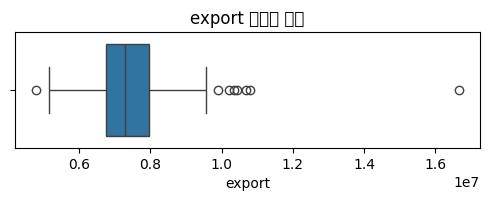

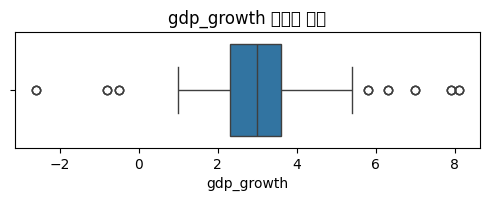

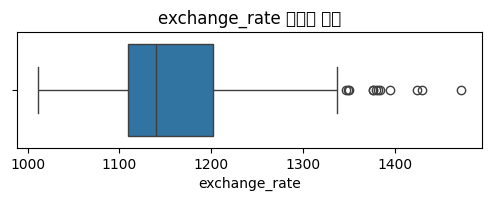

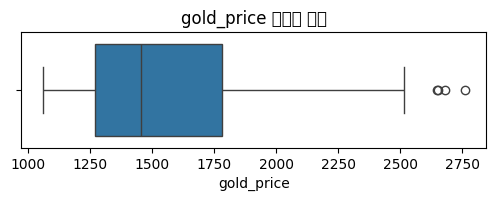

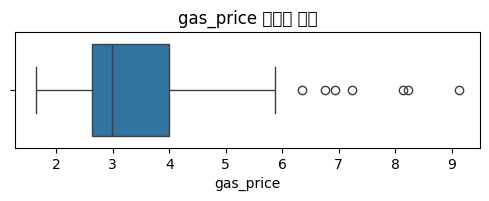

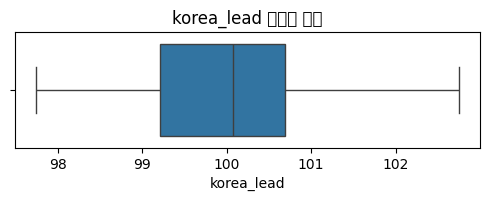

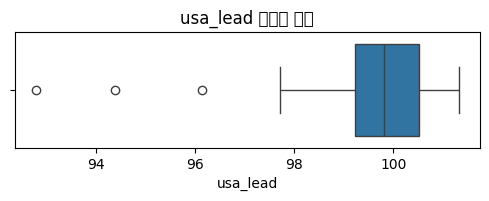

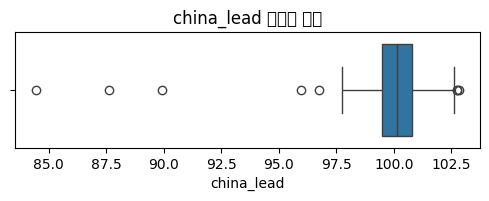

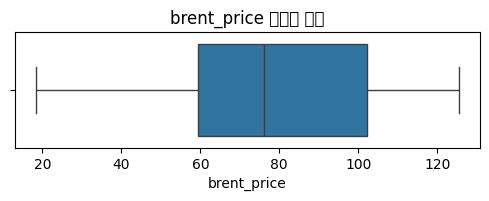

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = final_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=final_df[col])
    plt.title(f'{col} 이상치 확인')
    plt.show()


## scaling
- StandardScaler: 값들이 정규 분포에 가깝거나 선형 모델을 사용할 때

- MinMaxScaler: 값들을 특정 범위로 맞추고 싶을 때 (특히 신경망)

- RobustScaler: 이상치가 많을 때 사용
  - gas_price , usa , china

- 로그변환
  - export : 극단값 존재함. 큰값을 작게 만들어 정규성 높일 필요 있음

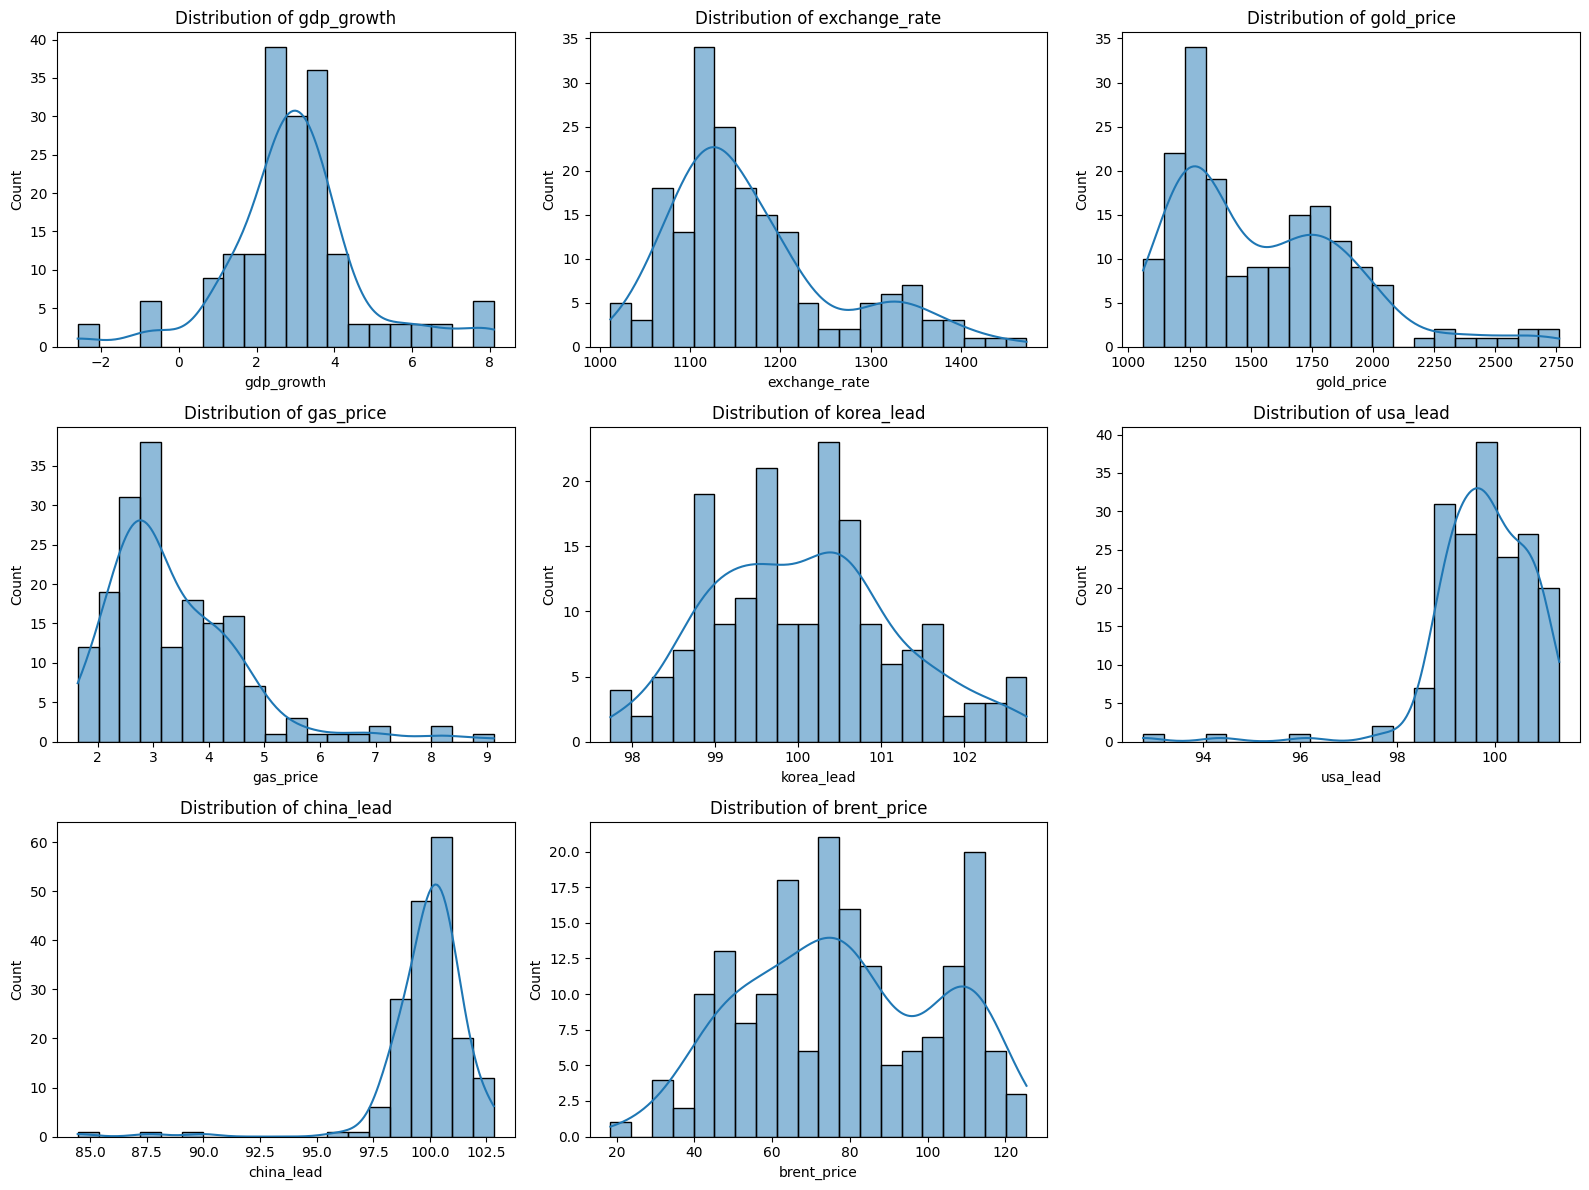

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 피처 리스트
features = ['gdp_growth', 'exchange_rate', 'gold_price', 'gas_price',
            'korea_lead', 'usa_lead', 'china_lead', 'brent_price']

# 시각화
plt.figure(figsize=(16, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(final_df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

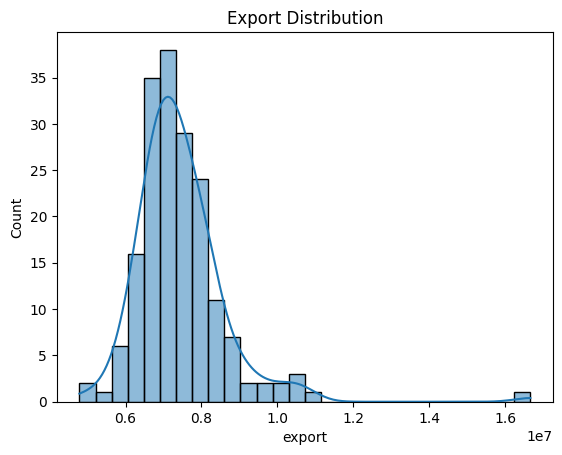

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(final_df['export'], kde=True)
plt.title("Export Distribution")
plt.show()

- standard scaler : gdp_growth ,   korea_lead, brent_price
- 로그 변환 및 min-max scaling 필요 : gold_price, exchange_rate, gas_price, usa_lead, china_lead , export

In [23]:
#standard scaling : gdp_growth, korea_lead (치우침 없어서 log 변환 x)
from sklearn.preprocessing import StandardScaler

standard_cols = ['gdp_growth', 'korea_lead']
standard_scaler = StandardScaler()
final_df[standard_cols] = standard_scaler.fit_transform(final_df[standard_cols])
final_df.head()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price
date,,,,,,,,,
2024-12,7696030,-1.012577,1472.5,2653.3,3.633,0.535854,100.42190,99.65845,73.86
2024-11,7556141,-1.012577,1394.7,2681.0,3.363,0.500066,100.28610,99.31903,74.35
2024-10,8004480,-1.012577,1379.9,2761.6,2.707,0.501237,100.12110,99.01940,75.63
2024-09,6946622,-0.843658,1307.8,2647.9,2.923,0.521521,99.96052,98.79619,74.02
2024-08,7602667,-0.843658,1336.0,2516.0,2.127,0.540181,99.82787,98.69521,80.36


In [24]:
#log 후 standard scaler : brent_price (치우침 존재해서 log 변환 후 스케일러)
final_df['brent_price_log'] = np.log1p(final_df['brent_price'])
final_df['brent_price_scaled'] = standard_scaler.fit_transform(final_df[['brent_price_log']])
final_df = final_df.drop(columns=['brent_price', 'brent_price_log'])


In [25]:
#로그변환 후 min-max_scaling
from sklearn.preprocessing import MinMaxScaler
import numpy as np

skewed_cols = ['exchange_rate', 'gold_price', 'gas_price', 'usa_lead', 'china_lead']
for col in skewed_cols:
    final_df[col + '_log'] = np.log1p(final_df[col])  # 로그 변환

minmax_scaler = MinMaxScaler()
final_df[[col + '_scaled' for col in skewed_cols]] = minmax_scaler.fit_transform(final_df[[col + '_log' for col in skewed_cols]])


In [26]:
import numpy as np
from sklearn.preprocessing import RobustScaler

# 로그 변환 (치우친 왜도 완화)
final_df['export_log'] = np.log1p(final_df['export'])

# RobustScaler (중앙값 기준 스케일링)
robust_scaler = RobustScaler()
final_df['export_log_scaled'] = robust_scaler.fit_transform(final_df[['export_log']])

# 3. 기존 export 관련 컬럼 정리 (필요한 경우)
final_df = final_df.drop(columns=['export', 'export_log'])


In [27]:
columns_to_keep = [
    'export_log_scaled',
    'gdp_growth',
    'china_lead_scaled',
    'korea_lead',
    'usa_lead_scaled',
    'gas_price_scaled',
    'gold_price_scaled',
    'exchange_rate_scaled',
    'brent_price_scaled'
]

df = final_df[columns_to_keep]


In [28]:
df.columns = [
    'export',
    'gdp_growth',
    'china_lead',
    'korea_lead',
    'usa_lead',
    'gas_price',
    'gold_price',
    'exchange_rate',
    'brent_price'
]

In [29]:
df.head()

,export,gdp_growth,china_lead,korea_lead,usa_lead,gas_price,gold_price,exchange_rate,brent_price
date,,,,,,,,,
2024-12,0.331558,-1.012577,0.840909,0.535854,0.898344,0.418339,0.958202,1.000000,-0.001894
2024-11,0.220078,-1.012577,0.823571,0.500066,0.882982,0.373677,0.969053,0.855318,0.017047
2024-10,0.570371,-1.012577,0.808217,0.501237,0.864288,0.252482,1.000000,0.826884,0.065953
2024-09,-0.291043,-0.843658,0.796749,0.521521,0.846066,0.294607,0.956073,0.683854,0.004304
2024-08,0.257383,-0.843658,0.791553,0.540181,0.830991,0.125924,0.902689,0.740713,0.239846


In [30]:
df.describe()

,export,gdp_growth,china_lead,korea_lead,usa_lead,gas_price,gold_price,exchange_rate,brent_price
count,180.000000,1.800000e+02,180.000000,1.800000e+02,180.000000,180.000000,180.000000,180.000000,1.800000e+02
mean,0.060239,-7.894919e-17,0.851214,1.237529e-14,0.826764,0.351810,0.371870,0.373328,8.289665e-16
std,0.870906,1.002789e+00,0.107770,1.002789e+00,0.120028,0.186386,0.228024,0.205477,1.002789e+00
min,-2.555011,-3.152221e+00,0.000000,-2.101624e+00,0.000000,0.000000,0.000000,0.000000,-3.925339e+00
25%,-0.460294,-3.932065e-01,0.832268,-7.745149e-01,0.763318,0.236151,0.188513,0.246529,-6.290081e-01
50%,0.000000,9.384402e-04,0.866112,4.298193e-03,0.828502,0.306737,0.331237,0.318247,8.219554e-02
75%,0.539706,3.387769e-01,0.898522,5.567684e-01,0.910649,0.474144,0.541828,0.459804,9.337873e-01
max,5.025811,2.872566e+00,1.000000,2.409033e+00,1.000000,1.000000,1.000000,1.000000,1.520090e+00


----

#스케일링2(다른 방법 사용으로 주석 처리)

In [31]:
# #정규분포에 가까운 데이터
# from sklearn.preprocessing import StandardScaler

# standard_cols = ['gdp_growth', 'korea_lead', 'brent_price']
# standard_scaler = StandardScaler()
# final_df[standard_cols] = standard_scaler.fit_transform(final_df[standard_cols])
# final_df.head()

In [32]:
# final_df.describe()

In [33]:
# #로그변환 후 min-max_scaling
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# skewed_cols = ['exchange_rate', 'gold_price', 'gas_price', 'usa_lead', 'china_lead']
# for col in skewed_cols:
#     final_df[col + '_log'] = np.log1p(final_df[col])  # 로그 변환

# minmax_scaler = MinMaxScaler()
# final_df[[col + '_scaled' for col in skewed_cols]] = minmax_scaler.fit_transform(final_df[[col + '_log' for col in skewed_cols]])


In [34]:
# # 삭제할 컬럼: 원본 + log
# columns_to_drop = ['gold_price', 'gas_price', 'usa_lead', 'china_lead',
#                    'gold_price_log', 'gas_price_log', 'usa_lead_log', 'china_lead_log',
#                    'exchange_rate', 'exchange_rate_log']

# # 데이터프레임에서 삭제
# final_df = final_df.drop(columns=columns_to_drop)


In [35]:
# final_df.describe()

In [36]:
# #target값은 극단값의 영향을 적게 받는 robust scaler 사용
# from sklearn.preprocessing import RobustScaler

# # 스케일링
# scaler = RobustScaler()
# final_df['export_scaled'] = scaler.fit_transform(final_df[['export']])

# # 예측 결과 또는 기존 scaled 데이터를 다시 원래 값으로 변환
# final_df['export_restored'] = scaler.inverse_transform(final_df[['export_scaled']])
# final_df = final_df.drop(columns=['export'])
# final_df.head()

# EDA
- 데이터프레임 설명
  - gdp_growth : gdp 성장률
  - exchange_rage : 원달러 환율
  - korea_lead : oecd 한국 경기선행지수
  - usa_lead_scaled : oecd 미국 경기선행지수
  - china_lead_scaled : oecd 중국 경기선행지수
  - brent_price : 유가
  - gold_price_scaled : 금값
  - gas_price_scaled : 천연가스

In [37]:
df = df.sort_index()  # 날짜 기준으로 오름차순 정렬

df.head()

,export,gdp_growth,china_lead,korea_lead,usa_lead,gas_price,gold_price,exchange_rate,brent_price
date,,,,,,,,,
2010-01,-2.098243,2.759953,0.971121,2.185557,0.759281,0.626720,0.022989,0.368376,0.086340
2010-02,-2.555011,2.759953,0.966645,2.037354,0.789157,0.587104,0.056272,0.364244,-0.006164
2010-03,-0.990725,2.759953,0.955387,1.889873,0.809058,0.455294,0.052157,0.297481,0.184728
2010-04,-1.234020,2.872566,0.939049,1.746989,0.817120,0.463045,0.112413,0.242986,0.394789
2010-05,-0.527848,2.872566,0.919872,1.603834,0.814566,0.524115,0.142319,0.460137,0.078051


In [38]:
df.tail()

,export,gdp_growth,china_lead,korea_lead,usa_lead,gas_price,gold_price,exchange_rate,brent_price
date,,,,,,,,,
2024-08,0.257383,-0.843658,0.791553,0.540181,0.830991,0.125924,0.902689,0.740713,0.239846
2024-09,-0.291043,-0.843658,0.796749,0.521521,0.846066,0.294607,0.956073,0.683854,0.004304
2024-10,0.570371,-1.012577,0.808217,0.501237,0.864288,0.252482,1.000000,0.826884,0.065953
2024-11,0.220078,-1.012577,0.823571,0.500066,0.882982,0.373677,0.969053,0.855318,0.017047
2024-12,0.331558,-1.012577,0.840909,0.535854,0.898344,0.418339,0.958202,1.000000,-0.001894


## 일변량 분석
- 개별 변수들의 특성 확인

In [39]:
df.keys()

Index(['export', 'gdp_growth', 'china_lead', 'korea_lead', 'usa_lead',
       'gas_price', 'gold_price', 'exchange_rate', 'brent_price'],
      dtype='object')

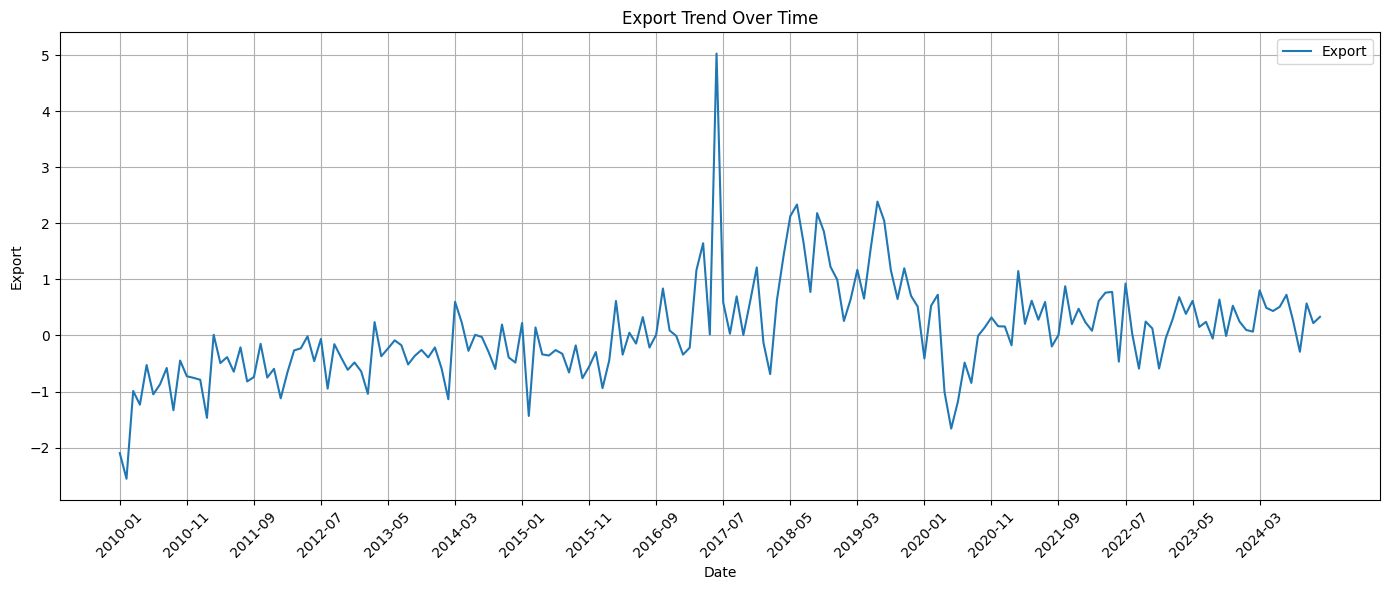

In [40]:
import matplotlib.pyplot as plt

# 예시 데이터프레임: df (index가 datetime 또는 str 형식의 월 정보)
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['export'], label='Export')

# x축 레이블 10개월마다 표시
plt.xticks(ticks=range(0, len(df.index), 10), labels=df.index[::10], rotation=45)

# 보기 좋게 꾸미기
plt.title('Export Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Export')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()



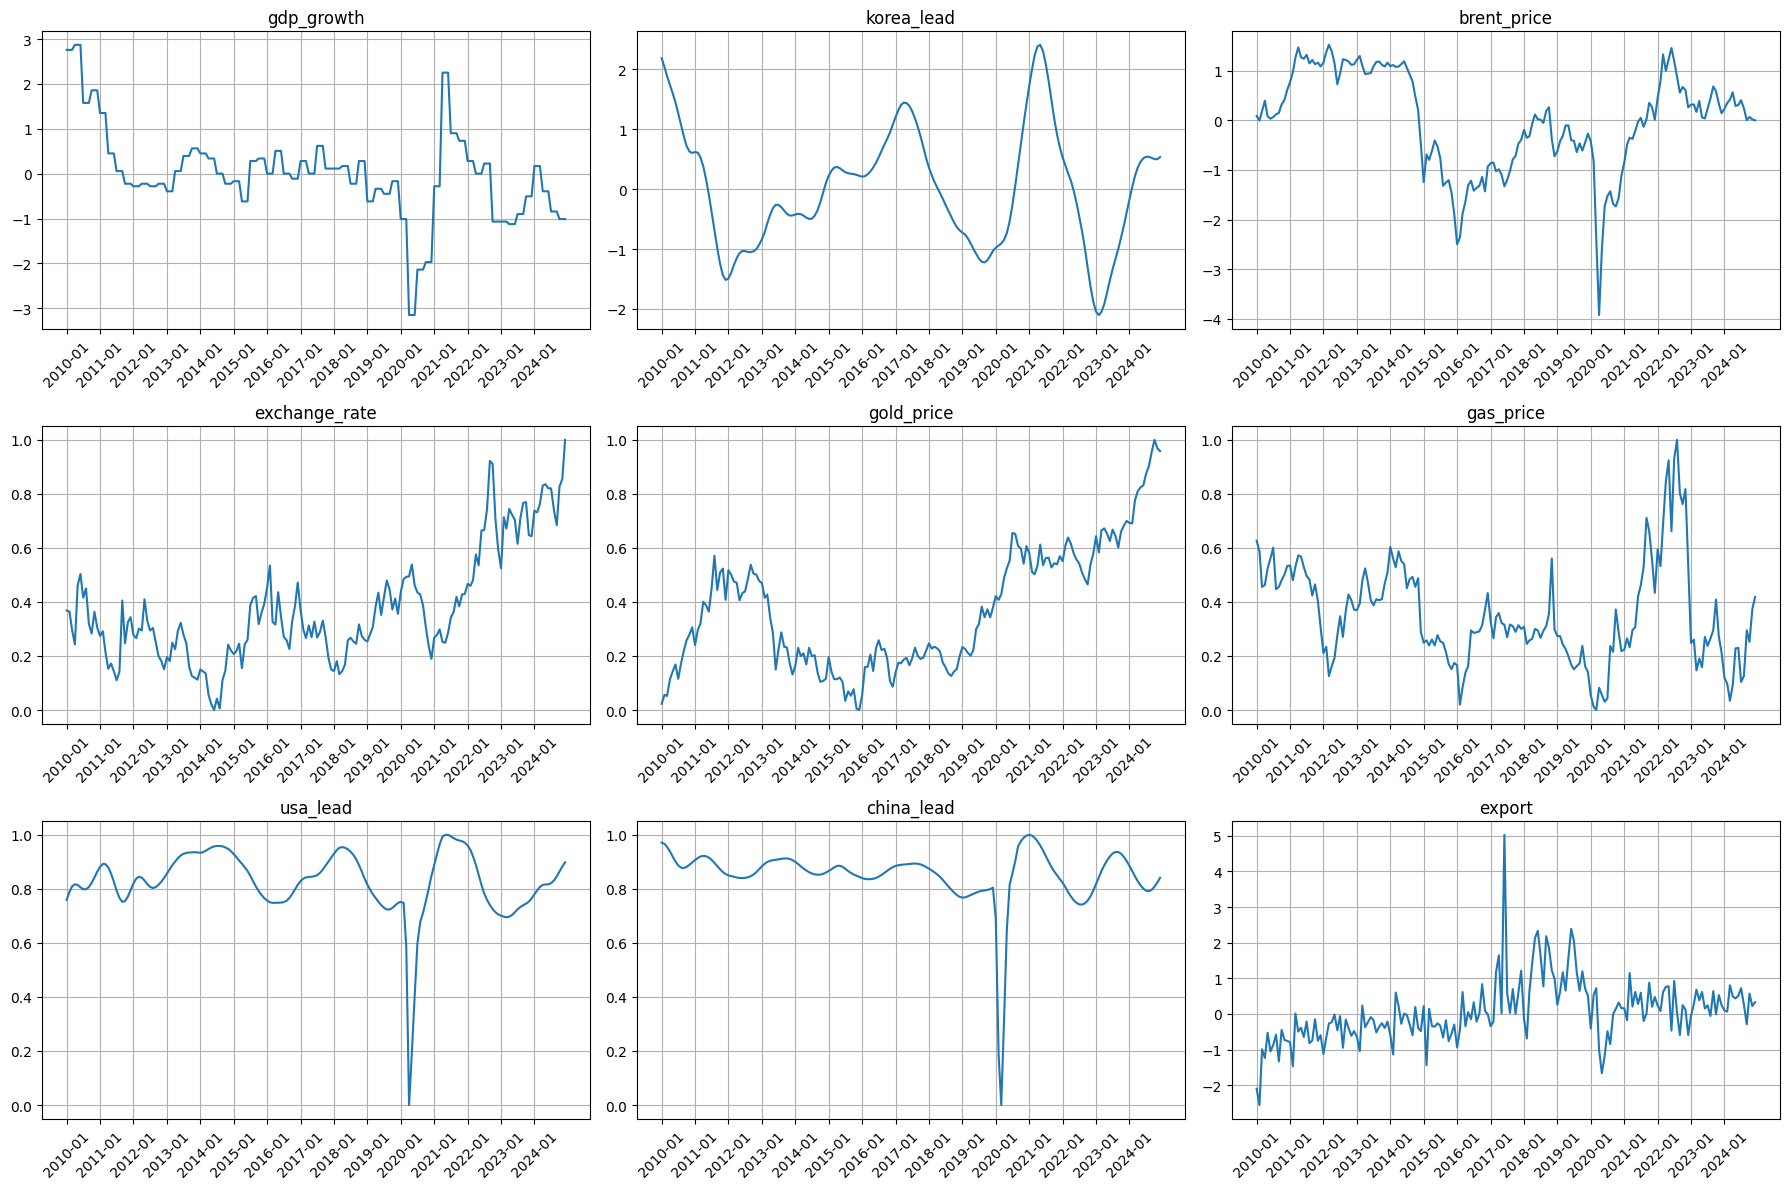

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# datetime 변환 (필요 시)
df = df.copy()
df.index = pd.to_datetime(df.index)

# 그래프에 표시할 컬럼들
columns = [
    'gdp_growth', 'korea_lead', 'brent_price',
    'exchange_rate', 'gold_price', 'gas_price',
    'usa_lead', 'china_lead', 'export'
]

# subplot 설정
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols
plt.figure(figsize=(18, n_rows * 4))

# 1년마다 1월인 날짜들 추출
tick_locs = [d for d in df.index if d.month == 1]

# 서브플롯 그리기
for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.plot(df.index, df[col], label=col)
    plt.title(col, fontsize=12)
    plt.xticks(ticks=tick_locs, labels=[d.strftime('%Y-%m') for d in tick_locs], rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [42]:
df['usa_lead'].unique()

array([0.75928063, 0.7891572 , 0.80905833, 0.81711979, 0.81456575,
       0.80596003, 0.79871638, 0.79854076, 0.80673041, 0.82168445,
       0.84201778, 0.86348314, 0.88157805, 0.89236249, 0.89180824,
       0.8795513 , 0.85690434, 0.82641908, 0.79380944, 0.76656867,
       0.75237268, 0.75468648, 0.7712358 , 0.79606356, 0.82081036,
       0.83812833, 0.84492463, 0.84165764, 0.83102097, 0.8176344 ,
       0.80730247, 0.80310598, 0.80672016, 0.8151693 , 0.82638495,
       0.84052829, 0.85689299, 0.87360485, 0.88767879, 0.90077478,
       0.9136639 , 0.92377527, 0.92979723, 0.93320151, 0.93462154,
       0.93513992, 0.93571461, 0.9350385 , 0.93376503, 0.93578222,
       0.94113338, 0.94761902, 0.95322344, 0.95716065, 0.95890384,
       0.95881388, 0.95720564, 0.95360597, 0.94792295, 0.93963531,
       0.92895164, 0.9167908 , 0.90471874, 0.89288278, 0.88032128,
       0.86640836, 0.84859264, 0.8280924 , 0.8081548 , 0.79163817,
       0.77775997, 0.76591567, 0.75647217, 0.75017065, 0.74820

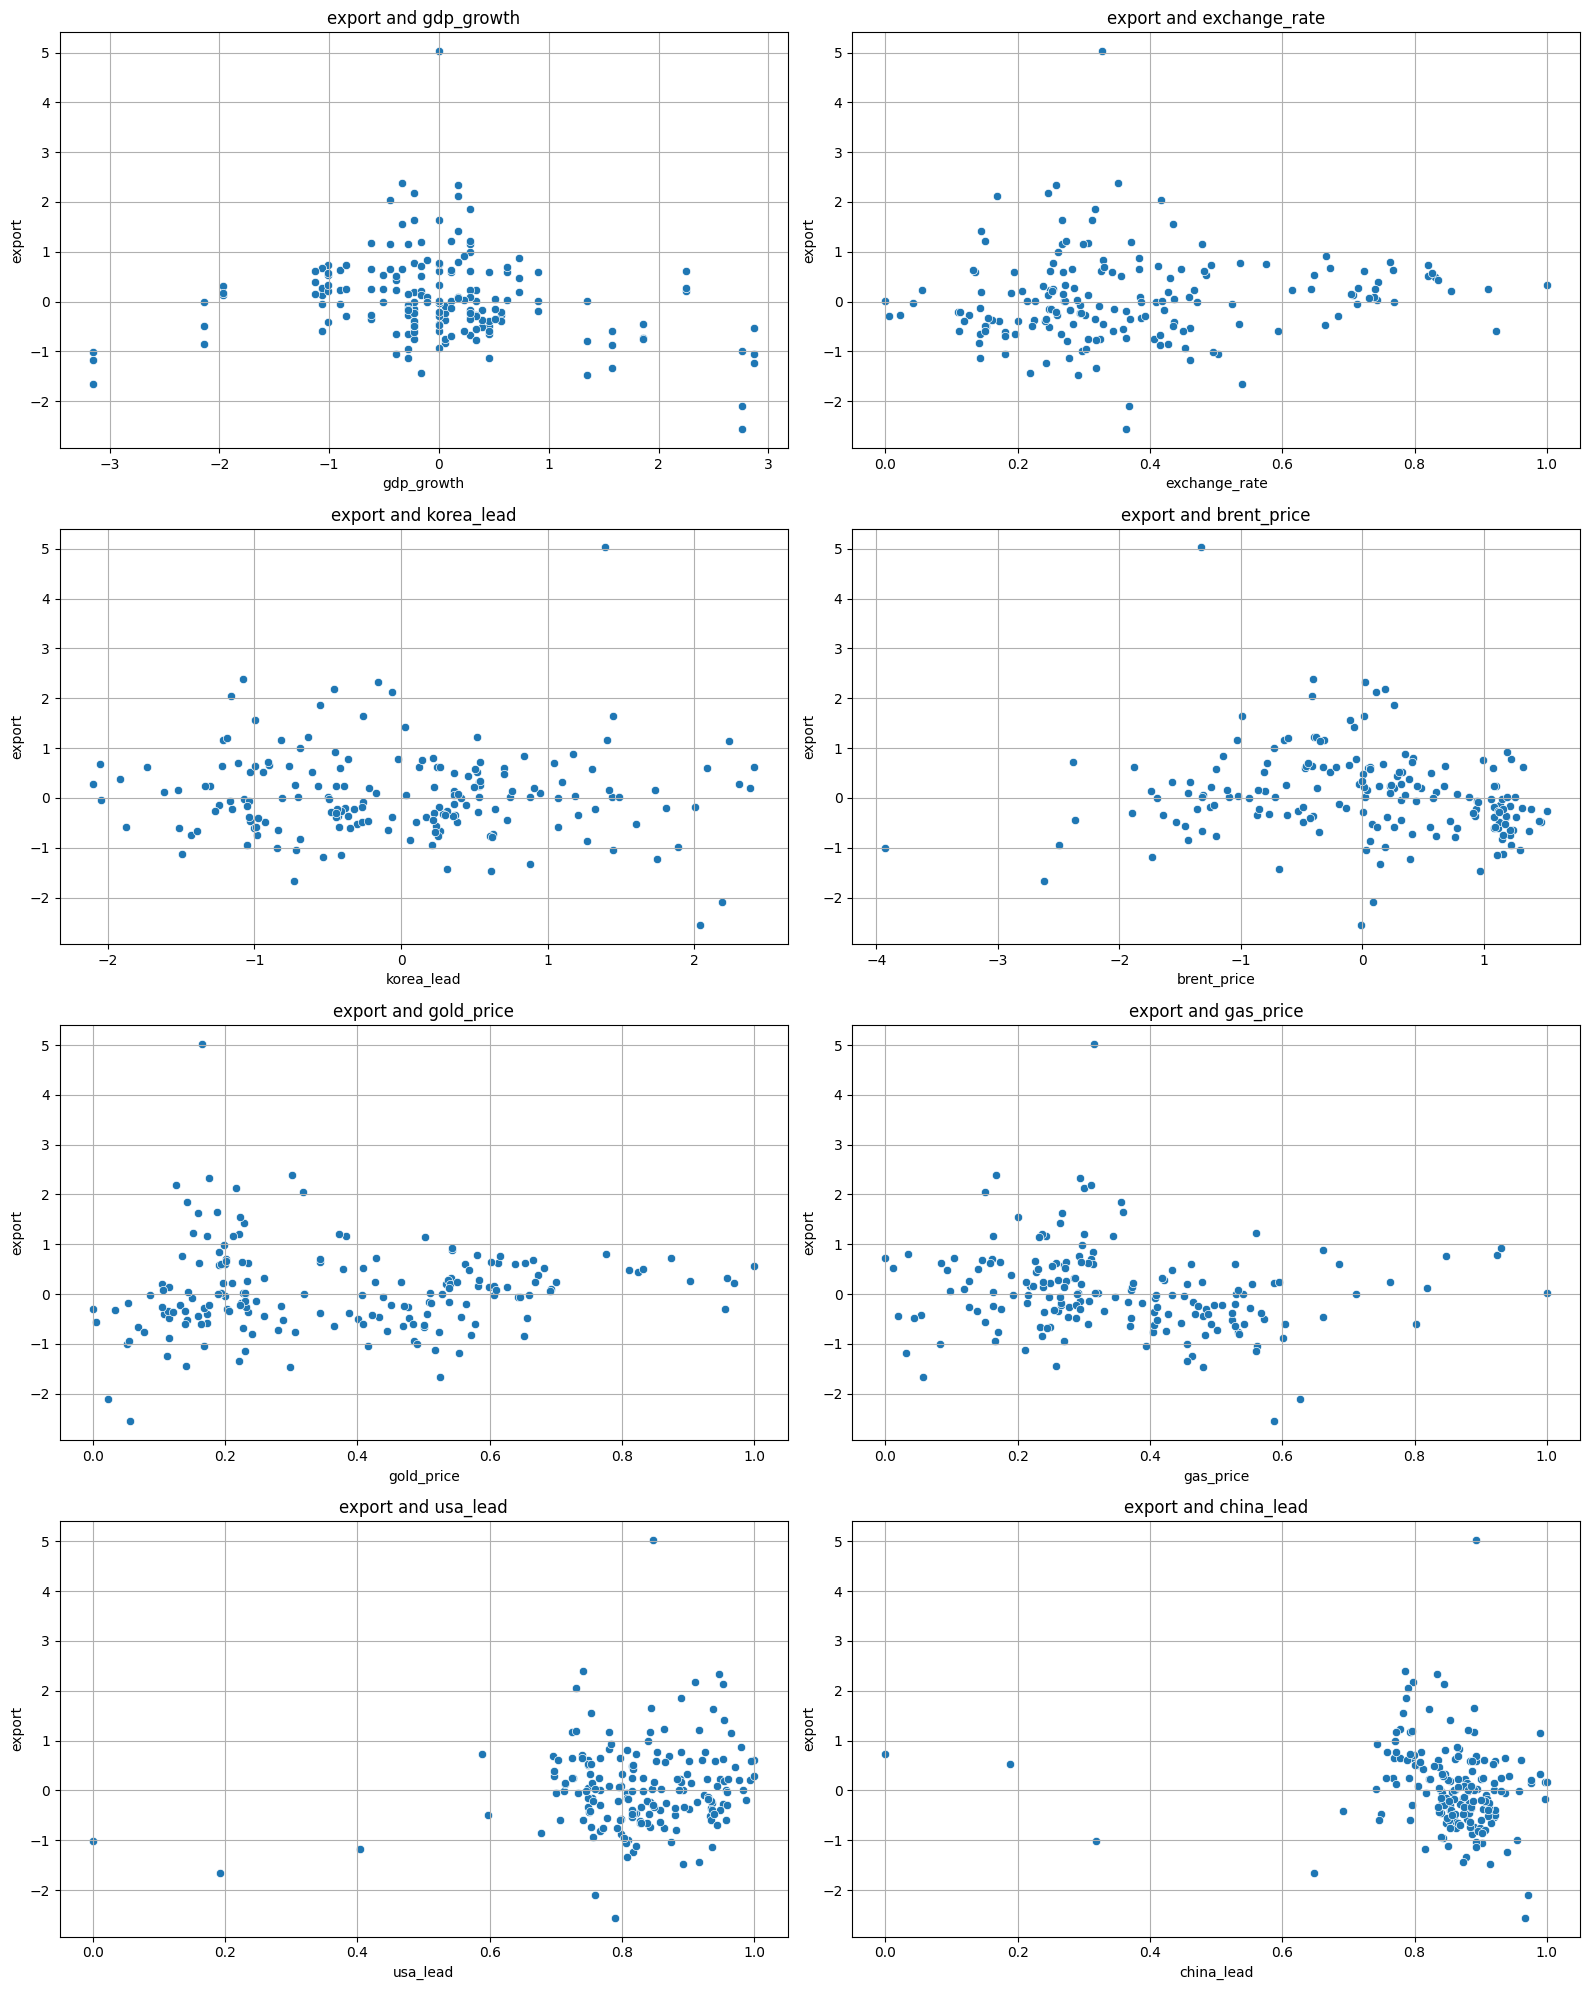

In [43]:
import seaborn as sns

target = 'export'
input_features = [
    'gdp_growth', 'exchange_rate', 'korea_lead', 'brent_price',
    'gold_price', 'gas_price', 'usa_lead', 'china_lead'
]

plt.figure(figsize=(16, 20))

for i, col in enumerate(input_features):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(data=df, x=col, y=target)
    plt.title(f'{target} and {col}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.grid(True)

plt.tight_layout()
plt.show()


##변수 간 상관관계

### 피처 간 다중공선성 확인(multicollinearity)
- 서로 강하게 상관된 피처가 있으면 영향력을 제대로 분리하기 어려워 예측력이 떨어지거나 해석 어려워지는 경우 있음 -> 하나만 쓰는게 나을 수 있다.
1. 상관관계 분석
2. VIF(Variance inflation fector, 분산확장요인) - 다중공선성 여부 확인  (어떤 변수가 다른 변수들과 얼마나 겹치는가)
  - 설명변수들끼리 겹치느냐를 보는 값.

- 다중공선성 vs 상관관계(correlation)
: 상관성 -> 독립변수와 종속변수를 구분하지 않고 두 변수 간의 상관 정도 계산
: 다중공선성 -> 독립변수들간의 관계(설명변수)를 고려하여 두 개 이상의 독립 변수들 간의 상관 정도 계산

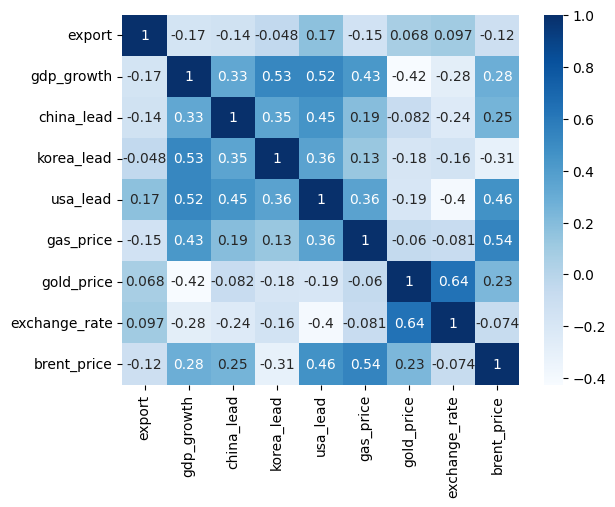

In [44]:
df.corr()
ax = sns.heatmap(df.corr(), cmap = 'Blues', annot=True)

#0.5 이상은 어느정도 뚜렷한 상관관계가 있다고 본다.
# 변수1          |      변수2      |   상관관계
# gdp_growth     |   korea_lead    |    0.53
# gdp_growth     |   usa_lead      |    0.52
# brent_price    |   gas_price     |    0.54
# exchange_rate  |   gold_price    |    0.64

In [45]:
#다중공선성 여부 확인
#VIF 척도 (분산팽창지수)
#VIF 10 이상이 되면 다중공선성 있다고 판단
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
def feature_engineering_XbyVIF(df):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(df.values, i)
                         for i in range(df.shape[1])]
    vif['Feature'] = df.columns
    return vif
X_features = df.drop(columns=['export']) #타겟 제외

vif = feature_engineering_XbyVIF(X_features)
vif.sort_values('VIF_Factor', ascending=False).reset_index(drop=True)
#다중공선성이 높은 변수, 즉 독립변수 간 상관관계가 높기 때문에 모델 학습에 방해가 될 수 있다.

,VIF_Factor,Feature
0,59.912741,china_lead
1,57.689241,usa_lead
2,12.285406,gold_price
3,9.738218,exchange_rate
4,7.462914,gas_price
5,3.449890,gdp_growth
6,3.265323,brent_price
7,2.648381,korea_lead


In [46]:
df = df.drop(columns = ['china_lead'])

In [47]:
#재확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
def feature_engineering_XbyVIF(df):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(df.values, i)
                         for i in range(df.shape[1])]
    vif['Feature'] = df.columns
    return vif
X_features = df.drop(columns=['export']) #타겟 제외

vif = feature_engineering_XbyVIF(X_features)
vif.sort_values('VIF_Factor', ascending=False).reset_index(drop=True)

,VIF_Factor,Feature
0,12.120002,gold_price
1,9.819823,usa_lead
2,9.704988,exchange_rate
3,7.364133,gas_price
4,3.449592,gdp_growth
5,3.127231,brent_price
6,2.636742,korea_lead


In [48]:
df = df.drop(columns = ['gold_price'])

In [49]:
#재확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
def feature_engineering_XbyVIF(df):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(df.values, i)
                         for i in range(df.shape[1])]
    vif['Feature'] = df.columns
    return vif
X_features = df.drop(columns=['export']) #타겟 제외

vif = feature_engineering_XbyVIF(X_features)
vif.sort_values('VIF_Factor', ascending=False).reset_index(drop=True)

,VIF_Factor,Feature
0,8.027676,usa_lead
1,7.102146,gas_price
2,4.115036,exchange_rate
3,2.101783,gdp_growth
4,2.065258,korea_lead
5,1.914840,brent_price


### 전체 상관계수 분석 (피어슨, 스피어, 켄달)

In [50]:
columns = ['export', 'gdp_growth', 'exchange_rate',
           'gas_price', 'korea_lead', 'usa_lead', 'brent_price']
df_corr = df[columns]


In [51]:
# 피어슨
corr_pearson = df_corr.corr(method='pearson')

# 스피어맨
corr_spearman = df_corr.corr(method='spearman')

# 켄달
corr_kendall = df_corr.corr(method='kendall')


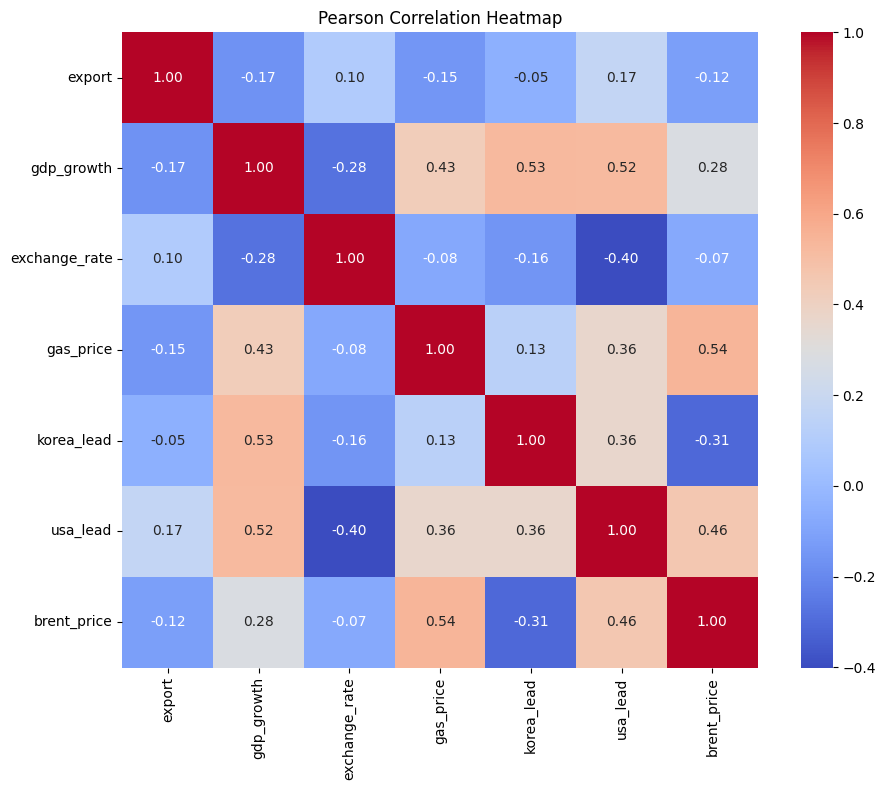

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()


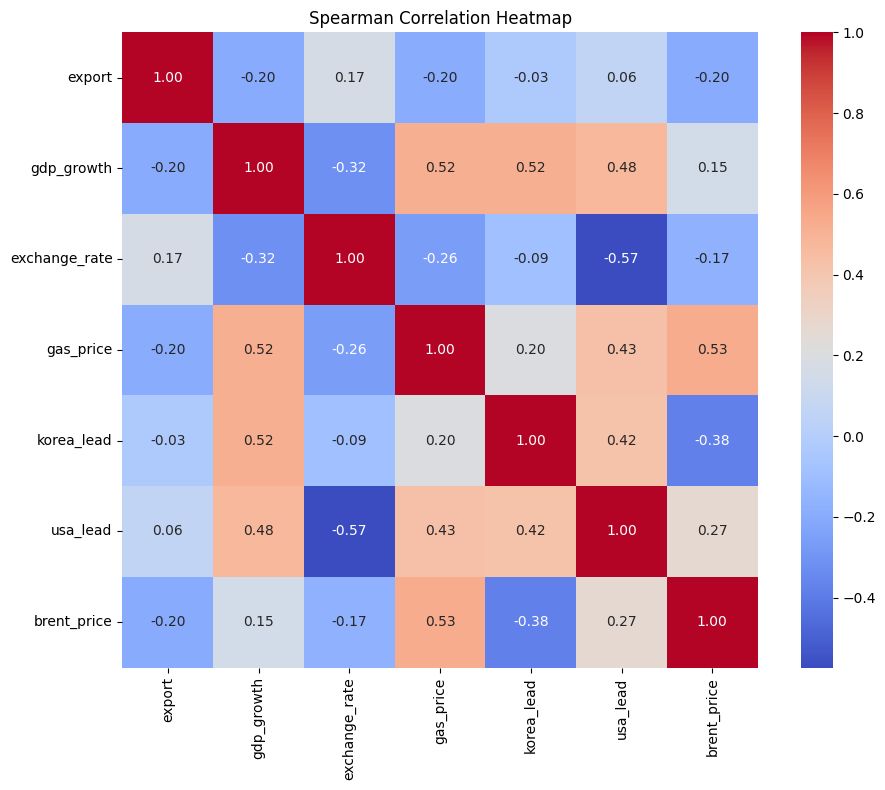

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Spearman Correlation Heatmap')
plt.tight_layout()
plt.show()


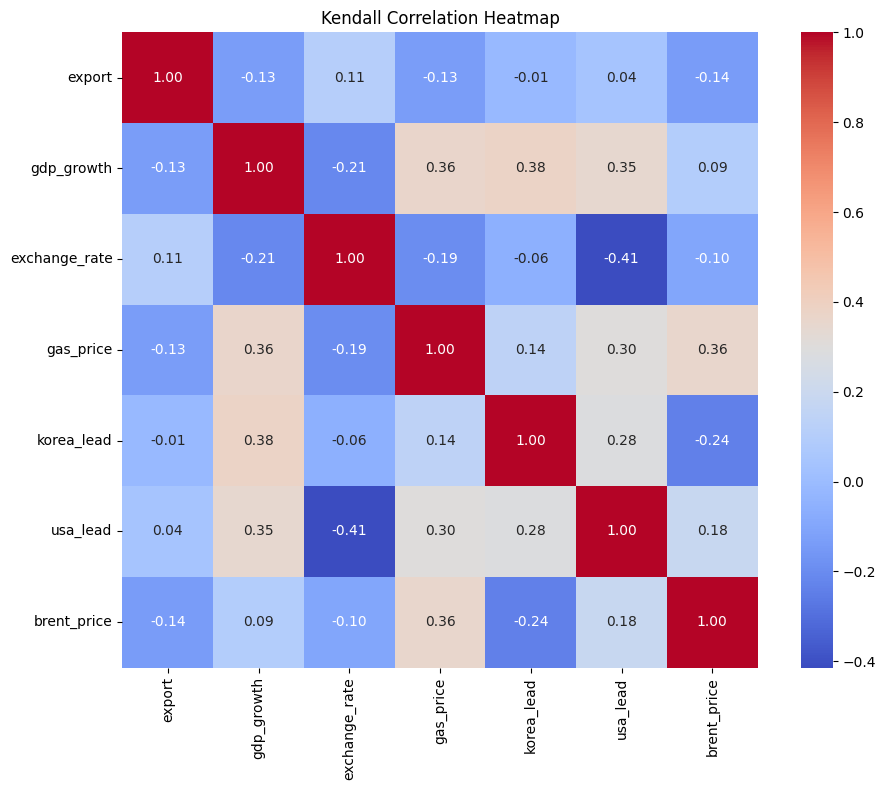

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_kendall, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Kendall Correlation Heatmap')
plt.tight_layout()
plt.show()


### 타켓 변수와의 상관관계 분석

In [55]:
corr_with_export = corr_pearson['export'].sort_values(ascending=False)
print(corr_with_export)

export           1.000000
usa_lead         0.170652
exchange_rate    0.096917
korea_lead      -0.047770
brent_price     -0.117083
gas_price       -0.149666
gdp_growth      -0.166085
Name: export, dtype: float64


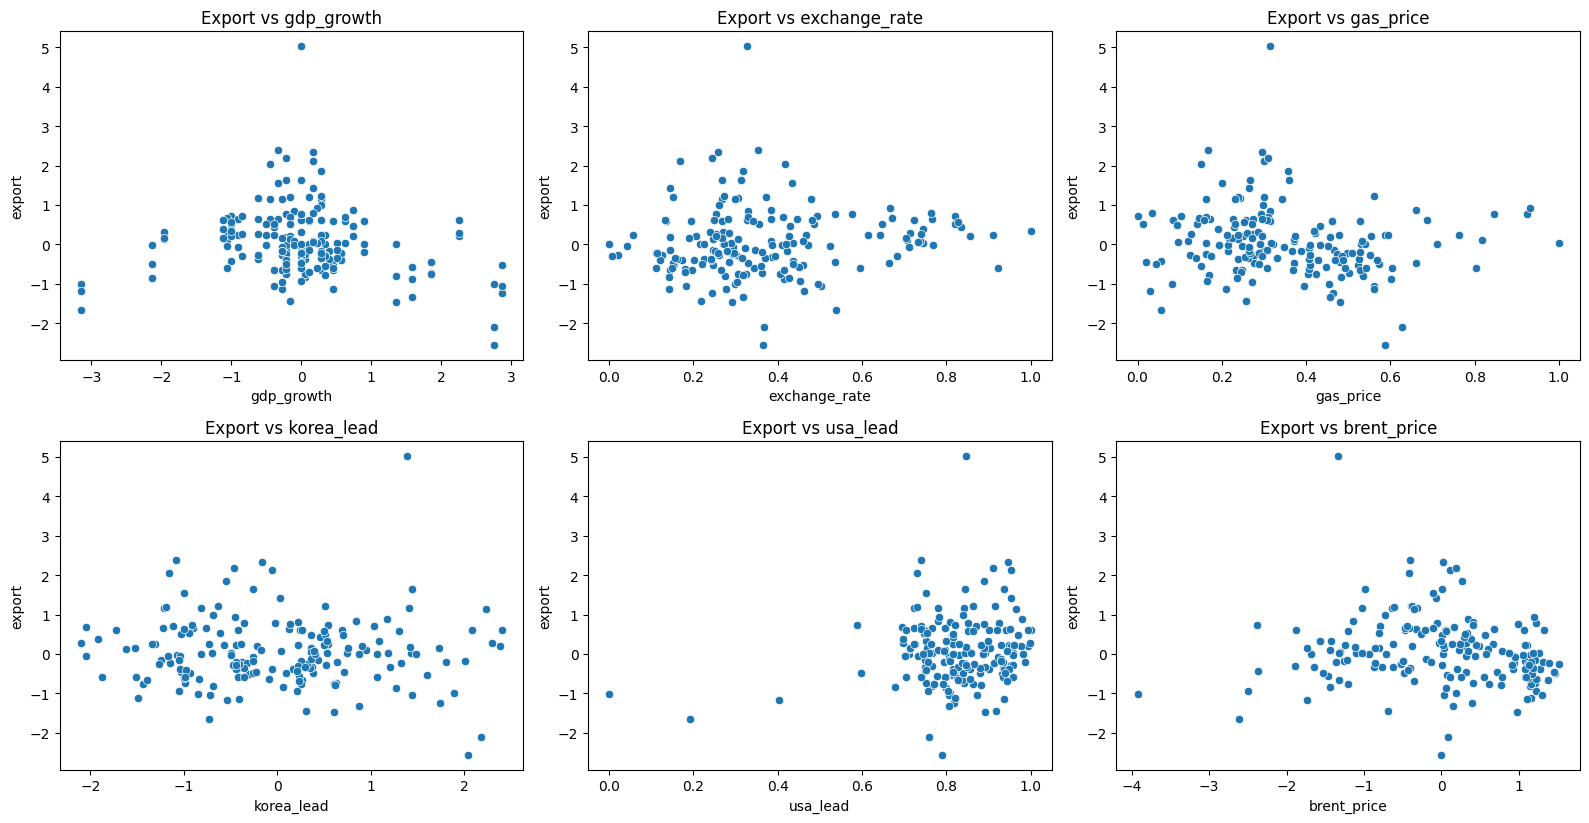

In [56]:
features = ['gdp_growth', 'exchange_rate', 'gas_price',
            'korea_lead', 'usa_lead', 'brent_price']

plt.figure(figsize=(16, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[col], y=df['export'])
    plt.title(f'Export vs {col}')
plt.tight_layout()
plt.show()


### 타겟 변수와의 상관관계

In [57]:
df.corr(method='pearson')

,export,gdp_growth,korea_lead,usa_lead,gas_price,exchange_rate,brent_price
export,1.000000,-0.166085,-0.047770,0.170652,-0.149666,0.096917,-0.117083
gdp_growth,-0.166085,1.000000,0.525679,0.522664,0.427492,-0.278481,0.283055
korea_lead,-0.047770,0.525679,1.000000,0.363756,0.131714,-0.157058,-0.309270
usa_lead,0.170652,0.522664,0.363756,1.000000,0.361374,-0.400608,0.462224
gas_price,-0.149666,0.427492,0.131714,0.361374,1.000000,-0.080890,0.542333
exchange_rate,0.096917,-0.278481,-0.157058,-0.400608,-0.080890,1.000000,-0.073828
brent_price,-0.117083,0.283055,-0.309270,0.462224,0.542333,-0.073828,1.000000


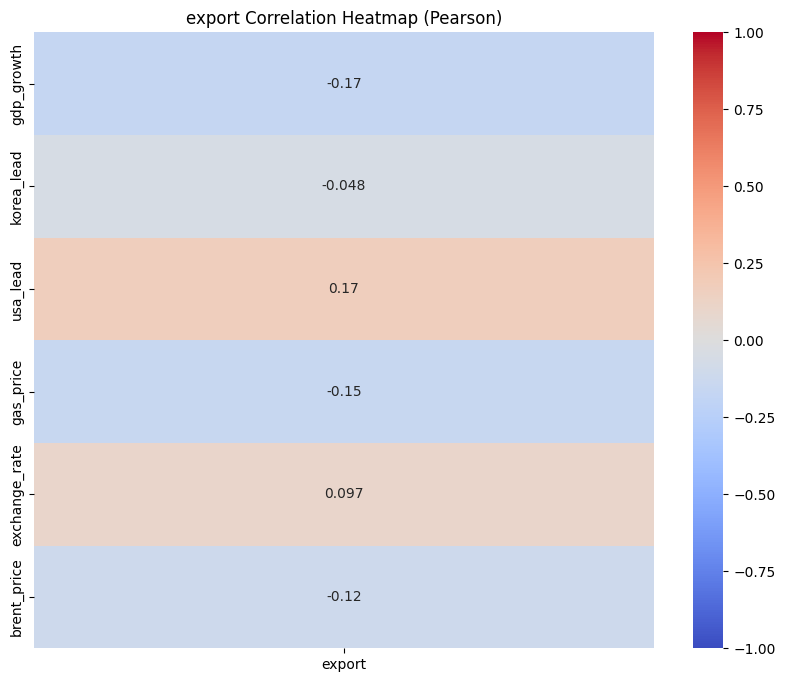

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(method='pearson')  # 'spearman' or 'kendall' 가능
plt.figure(figsize=(10, 8))
sns.heatmap(corr[[target]].drop(target), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'{target} Correlation Heatmap (Pearson)')
plt.show()
